<div class="usecase-title">Melbourne House Market Analysis</div>

<div class="usecase-authors"><b>Authored by: </b>Bao Ngo</div>

<div class="usecase-date"><b>Date: </b> July 2024</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill"></div>
    <div class="usecase-level"><b> Level: </b>Intermediate</div>
    <div class="usecase-skill"><b> Pre-requisite Skills: </b>Python </div>

<div class="usecase-section-header">Scenario</div>

1. Introduction:
The aim of this proposal is to leverage available datasets to create a comprehensive analysis of the Melbourne housing market. By utilizing various datasets provided by the City of Melbourne and external sources such as Kaggle, we aim to develop insights into housing price trends, identify factors influencing house prices, and provide valuable information for buyers, sellers, real estate agents, investors, and policymakers.

2. Objectives:
Analyze the Melbourne House Prices dataset to understand historical and current housing price trends.
Utilize data on property sales transactions to assess market activity and price fluctuations.
Combine insights from various datasets to forecast future housing prices and identify high-demand areas.

3. Methodology:
Data Collection: Gather datasets from the City of Melbourne Open Data site and Kaggle, including Melbourne House Prices.
Data Cleaning and Preparation: Clean and preprocess the datasets to ensure consistency and accuracy.
Data Analysis: Perform statistical analysis, data visualization, and trend analysis to identify patterns, forecast house prices.
Reporting: Generate reports, visualizations, and insights to present findings to stakeholders.

4. Proposed Deliverables:
Comprehensive analysis report on housing market trends in Melbourne.
Visualizations depicting historical and current house price trends and high-demand areas.
Forecasts of future house prices with recommendations for buyers, sellers, and policymakers.

5. Timeline:
Data Collection and Cleaning: 2 weeks
Data Analysis and Visualization: 3 weeks
Report Writing and Presentation: 1 week

### Libraries Used

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import math
from io import StringIO
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Dependencies
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import io
pd.set_option('display.max_columns', None)

### Load data and perform data preprocessing

In [2]:
# Function to collect datasets using API

def datasetcollect(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = " "
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

### Dataset 1: 

In [7]:
dataset_id = 'house-prices-by-small-area-sale-year'
price_area = datasetcollect(dataset_id)
print(len(price_area))

347


In [8]:
price_area.head()

,sale_year,small_area,type,median_price,transaction_count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258


In [9]:
price_area.value_counts()

sale_year  small_area                    type                   median_price  transaction_count
2000       Carlton                       House/Townhouse        316250.0      116                  1
2011       East Melbourne                House/Townhouse        1352500.0     30                   1
           North Melbourne               Residential Apartment  438000.0      208                  1
                                         House/Townhouse        724750.0      110                  1
           Melbourne (Remainder)         Residential Apartment  631250.0      68                   1
                                                                                                  ..
2005       South Yarra                   House/Townhouse        870000.0      43                   1
           Parkville                     Residential Apartment  295000.0      71                   1
                                         House/Townhouse        845000.0      66                

In [10]:
price_area.describe()

,sale_year,median_price,transaction_count
count,347.000000,3.190000e+02,347.000000
mean,2008.268012,6.612860e+05,277.051873
std,4.928411,8.863439e+05,480.421188
min,2000.000000,0.000000e+00,1.000000
25%,2004.000000,3.662810e+05,44.500000
50%,2008.000000,4.873000e+05,118.000000
75%,2013.000000,6.787500e+05,224.000000
max,2016.000000,1.430000e+07,3766.000000


### Dataset 2: House price

In [14]:
melbourne_house_prices = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")


In [15]:
melbourne_house_prices.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [17]:
# Display basic information and summary statistics
print("Dataset Information:")
melbourne_house_prices.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [18]:
print("\nSummary Statistics:")
print(melbourne_house_prices.describe(include='all'))


Summary Statistics:
           Suburb       Address         Rooms   Type         Price Method  \
count       63023         63023  63023.000000  63023  4.843300e+04  63023   
unique        380         57754           NaN      3           NaN      9   
top     Reservoir  5 Charles St           NaN      h           NaN      S   
freq         1241             7           NaN  45053           NaN  34063   
mean          NaN           NaN      3.110595    NaN  9.978982e+05    NaN   
std           NaN           NaN      0.957551    NaN  5.934989e+05    NaN   
min           NaN           NaN      1.000000    NaN  8.500000e+04    NaN   
25%           NaN           NaN      3.000000    NaN  6.200000e+05    NaN   
50%           NaN           NaN      3.000000    NaN  8.300000e+05    NaN   
75%           NaN           NaN      4.000000    NaN  1.220000e+06    NaN   
max           NaN           NaN     31.000000    NaN  1.120000e+07    NaN   

       SellerG        Date      Postcode             R

In [19]:
print("\nMissing Values:")
print(melbourne_house_prices.isnull().sum())


Missing Values:
Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64


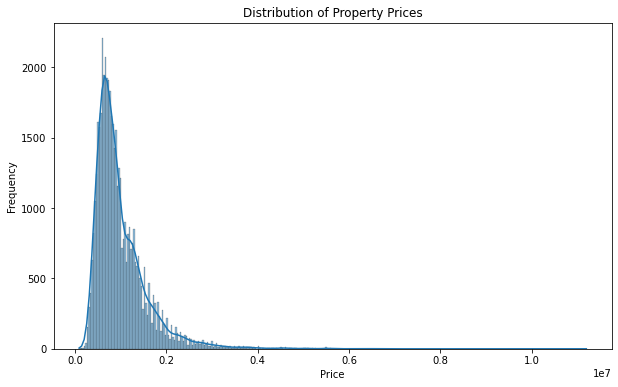

In [20]:
# Plotting distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(melbourne_house_prices['Price'].dropna(), kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

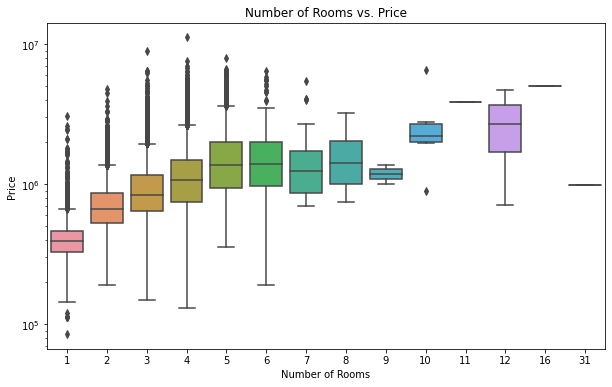

In [21]:
# Plotting number of rooms vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=melbourne_house_prices)
plt.title('Number of Rooms vs. Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.yscale('log')
plt.show()


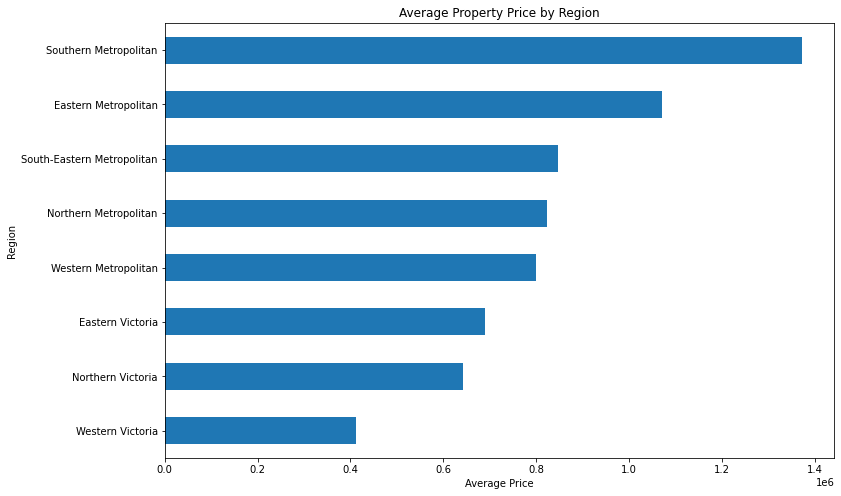

In [22]:
# Average price by region
avg_price_by_region = melbourne_house_prices.groupby('Regionname')['Price'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_price_by_region.plot(kind='barh')
plt.title('Average Property Price by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

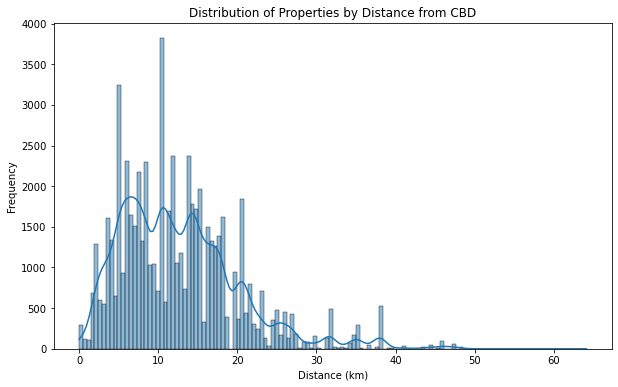

In [23]:
# Distribution of properties by distance from CBD
plt.figure(figsize=(10, 6))
sns.histplot(melbourne_house_prices['Distance'], kde=True)
plt.title('Distribution of Properties by Distance from CBD')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

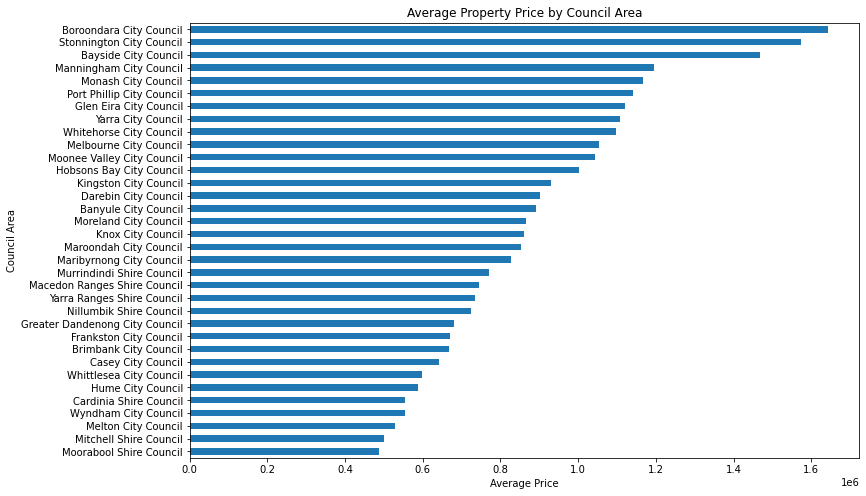

In [24]:
# Average price by council area
avg_price_by_council = melbourne_house_prices.groupby('CouncilArea')['Price'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_price_by_council.plot(kind='barh')
plt.title('Average Property Price by Council Area')
plt.xlabel('Average Price')
plt.ylabel('Council Area')
plt.show()